<a href="https://colab.research.google.com/github/Nova1323/Machine-Learning/blob/master/Natural%20Language%20Processing/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import tweepy as tw

In [2]:
# Authenticate to Twitter
auth = tw.OAuthHandler("trAm8wZD11mQgN1ocV6FVngZ3", "J800JrNuCniKxL2FlAon6IDBjGnXys52imGXy0srthuWCRckZZ")
auth.set_access_token("2744929320-rAV9p5JTDV5BNzVEHhs5xOhkShzTasLWPr9UbW8", "fd4WhOwyEL5fTLfoGF9NgB8zLG5YRWRG3CG82FTkF5I9I")

# Create API object
api = tw.API(auth,wait_on_rate_limit=True)

In [3]:
search_words = "#coronavirus OR #covid19 OR #lockdown" #enter the words to be searched here
date_since = "2020-07-07" #enter the date from which you want the data to be searched from yyyy/mm/dd
geocodes = "20.593700, 78.962900, 100mi"

In [4]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(360) #change items for the max number of tweet pulls

In [ ]:
tweet_details = [[tweet.text, tweet.user.location] for tweet in tweets]
#extracts the text and location of the tweet

In [6]:
tweet_df = pd.DataFrame(data=tweet_details, columns=['text', "location"])
pd.set_option('max_colwidth', 800)
tweet_df.head(25)

,text,location
0,@live_2_bike I wonder how many of these are infected with #Covid19 🤔,"Ottawa, Ontario"
1,"RT @carol_rivers: Needing a post #lockdown glow? Guaranteed shot of cosy, familiar nostalgia here. #isolation #Romance #bestseller #Histori…",Kent
2,"@realDonaldTrump Chris Wallace of @foxnews called you out on this lie yesterday. Time to move on to the 139,000 Am… https://t.co/tYdYFzS9gw",USA
3,"RT @govkristinoem: NEWS: South Dakota closed the 2020 budget year with a $19 million surplus. Despite challenges with #COVID19, we remain i…",PA
4,RT @tbplante: My wife just successfully delivered our child wearing a mask the entire time. \n\nThat's the whole tweet.\n\n#COVID19,"Small Town, NE"
5,@CostaCoffee just used the drive thru at one of your stores - staff weren’t social distancing or wearing face masks… https://t.co/tTyAUshT8N,Manchester
6,RT @BBCNewsnight: “The more we find out about #Covid19 the more we realise that it has the potential to have long lasting effects on your o…,United Kingdom
7,RT @trumpocalyps17: @joshtpm @TPM So @realDonaldTrump has openly declared war on American citizens. This is so grossly unconstitutional it…,"Rhode Island, United States"
8,"RT @govkristinoem: NEWS: South Dakota closed the 2020 budget year with a $19 million surplus. Despite challenges with #COVID19, we remain i…",C-Ville
9,"RT @zeusFanHouse: #Lockdown Forever: More than Half of U.S. States Reverse Reopening, Reimpose Restrictions\n\nhttps://t.co/MppxoQHiEs\n\nQAnon…",United States


In [7]:
tweet_df.location.value_counts() #counts the number of tweets from a specific location

                               117
United States                    7
India                            6
New York                         5
London                           4
                              ... 
🪐                                1
Gulf Coast, fer de moment        1
Bangkok, Thailand                1
Hyderabad, Telangana, India      1
Kent                             1
Name: location, Length: 188, dtype: int64

In [8]:
#cleaning the data
import re
def clean_tweets(text):
    text = re.sub("RT @[\w]*:","",text)
    text = re.sub("@[\w]*","",text)
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text = re.sub("\n","",text)
    return text

In [9]:
#lambda function implemtnts the clean function on every row of the dataframe 
tweet_df['text']=tweet_df['text'].apply(lambda x: clean_tweets(x))
tweet_df.head(25)

,text,location
0,I wonder how many of these are infected with #Covid19 🤔,"Ottawa, Ontario"
1,"Needing a post #lockdown glow? Guaranteed shot of cosy, familiar nostalgia here. #isolation #Romance #bestseller #Histori…",Kent
2,"Chris Wallace of called you out on this lie yesterday. Time to move on to the 139,000 Am…",USA
3,"NEWS: South Dakota closed the 2020 budget year with a $19 million surplus. Despite challenges with #COVID19, we remain i…",PA
4,My wife just successfully delivered our child wearing a mask the entire time. That's the whole tweet.#COVID19,"Small Town, NE"
5,just used the drive thru at one of your stores - staff weren’t social distancing or wearing face masks…,Manchester
6,“The more we find out about #Covid19 the more we realise that it has the potential to have long lasting effects on your o…,United Kingdom
7,So has openly declared war on American citizens. This is so grossly unconstitutional it…,"Rhode Island, United States"
8,"NEWS: South Dakota closed the 2020 budget year with a $19 million surplus. Despite challenges with #COVID19, we remain i…",C-Ville
9,"#Lockdown Forever: More than Half of U.S. States Reverse Reopening, Reimpose RestrictionsQAnon…",United States


In [10]:
#library for Sentiment Analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [11]:
sia = SentimentIntensityAnalyzer()
#getting the sentiment scores of the tweets
tweet_df['sentiment_score']=tweet_df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
tweet_df.head(25)

,text,location,sentiment_score
0,I wonder how many of these are infected with #Covid19 🤔,"Ottawa, Ontario",-0.4939
1,"Needing a post #lockdown glow? Guaranteed shot of cosy, familiar nostalgia here. #isolation #Romance #bestseller #Histori…",Kent,0.0000
2,"Chris Wallace of called you out on this lie yesterday. Time to move on to the 139,000 Am…",USA,0.0000
3,"NEWS: South Dakota closed the 2020 budget year with a $19 million surplus. Despite challenges with #COVID19, we remain i…",PA,-0.0572
4,My wife just successfully delivered our child wearing a mask the entire time. That's the whole tweet.#COVID19,"Small Town, NE",0.4939
5,just used the drive thru at one of your stores - staff weren’t social distancing or wearing face masks…,Manchester,0.0000
6,“The more we find out about #Covid19 the more we realise that it has the potential to have long lasting effects on your o…,United Kingdom,0.0000
7,So has openly declared war on American citizens. This is so grossly unconstitutional it…,"Rhode Island, United States",-0.7500
8,"NEWS: South Dakota closed the 2020 budget year with a $19 million surplus. Despite challenges with #COVID19, we remain i…",C-Ville,-0.0572
9,"#Lockdown Forever: More than Half of U.S. States Reverse Reopening, Reimpose RestrictionsQAnon…",United States,0.0000


In [15]:
#overall sentiment of the tweet
#change values to edit threshold of sentiments
sentiment=[]
for score in tweet_df['sentiment_score']:
  if score > 0.05:
    sentiment.append("Positive")
  elif score < -0.05:
    sentiment.append("Negative")
  else:
    sentiment.append("Neutral")
tweet_df['Sentiment']=sentiment
tweet_df.head(25)

,text,location,sentiment_score,Sentiment
0,I wonder how many of these are infected with #Covid19 🤔,"Ottawa, Ontario",-0.4939,Negative
1,"Needing a post #lockdown glow? Guaranteed shot of cosy, familiar nostalgia here. #isolation #Romance #bestseller #Histori…",Kent,0.0000,Neutral
2,"Chris Wallace of called you out on this lie yesterday. Time to move on to the 139,000 Am…",USA,0.0000,Neutral
3,"NEWS: South Dakota closed the 2020 budget year with a $19 million surplus. Despite challenges with #COVID19, we remain i…",PA,-0.0572,Negative
4,My wife just successfully delivered our child wearing a mask the entire time. That's the whole tweet.#COVID19,"Small Town, NE",0.4939,Positive
5,just used the drive thru at one of your stores - staff weren’t social distancing or wearing face masks…,Manchester,0.0000,Neutral
6,“The more we find out about #Covid19 the more we realise that it has the potential to have long lasting effects on your o…,United Kingdom,0.0000,Neutral
7,So has openly declared war on American citizens. This is so grossly unconstitutional it…,"Rhode Island, United States",-0.7500,Negative
8,"NEWS: South Dakota closed the 2020 budget year with a $19 million surplus. Despite challenges with #COVID19, we remain i…",C-Ville,-0.0572,Negative
9,"#Lockdown Forever: More than Half of U.S. States Reverse Reopening, Reimpose RestrictionsQAnon…",United States,0.0000,Neutral


In [16]:
tweet_df.to_csv("tweets.csv")

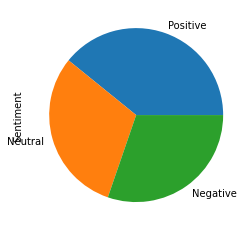

In [17]:
tweet_df['Sentiment'].value_counts().plot(kind='pie')